170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


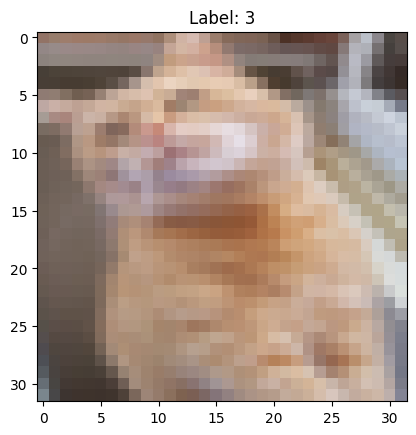

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1304s 830ms/step - accuracy: 0.3760 - loss: 1.9856 - val_accuracy: 0.5628 - val_loss: 1.3214
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1361s 842ms/step - accuracy: 0.6426 - loss: 1.0238 - val_accuracy: 0.7285 - val_loss: 0.7728
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1314s 824ms/step - accuracy: 0.7089 - loss: 0.8342 - val_accuracy: 0.6600 - val_loss: 1.0197
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1338s 822ms/step - accuracy: 0.7438 - loss: 0.7380 - val_accuracy: 0.7658 - val_loss: 0.6775
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1343s 822ms/step - accuracy: 0.7702 - loss: 0.6609 - val_accuracy: 0.7974 - val_loss: 0.5913
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1341s 822ms/step - accuracy: 0.7951 - loss: 0.5950 - val_accuracy: 0.7815 - val_loss: 0.6544
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1336s 818ms/step - accuracy: 0.8184 - loss: 0.5230 - val_accuracy: 0.7684 - val_loss: 0.6773
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1283s 819ms/s

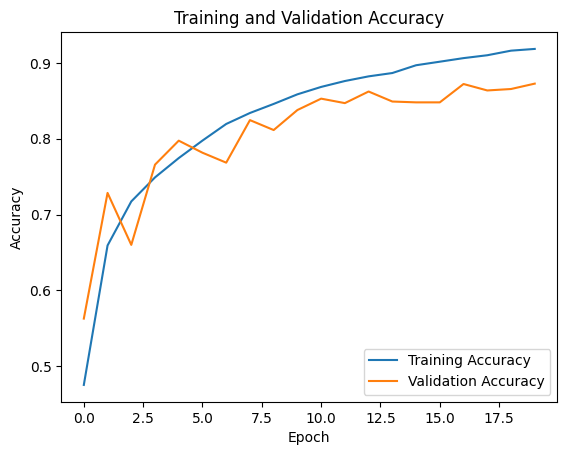

In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


random_index = np.random.randint(0, x_train.shape[0])
plt.imshow(x_train[random_index])
plt.title(f"Label: {y_train[random_index][0]}")
plt.show()


model = models.Sequential([

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),


    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),


    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),


    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
